In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#reading the dataset
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zomato_real.info() # Looking at the information about the dataset, datatypes of the coresponding columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [15]:
#Deleting Unnnecessary Columns
zomato = zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [16]:
zomato=zomato.drop(['menu_item'],axis=1)

In [17]:
zomato.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [18]:
zomato.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [19]:
## Removing the Duplicates
zomato.duplicated().sum()
#zomato.drop_duplicates(inplace=True)
#zomato_real.head() # looking at the dataset after transformation

50

In [20]:
zomato.drop_duplicates(inplace=True)

In [21]:
zomato.shape

(51667, 13)

In [22]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
#zomato.info() #.info() function is used to get a concise summary of the dataframe

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7765
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [23]:
zomato.dropna(how='any',inplace=True)

In [24]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [25]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost',
                                'listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [26]:
zomato.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [27]:
zomato.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
type            object
city            object
dtype: object

In [28]:
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [29]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Index: 43494 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43494 non-null  object 
 1   name          43494 non-null  object 
 2   online_order  43494 non-null  object 
 3   book_table    43494 non-null  object 
 4   rate          43494 non-null  object 
 5   votes         43494 non-null  int64  
 6   location      43494 non-null  object 
 7   rest_type     43494 non-null  object 
 8   cuisines      43494 non-null  object 
 9   cost          43494 non-null  float64
 10  reviews_list  43494 non-null  object 
 11  type          43494 non-null  object 
 12  city          43494 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [20]:
#Reading uninque values from the Rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [30]:
zomato.loc[zomato.rate =='-']

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
3068,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400.0,[],Delivery,Basavanagudi
3373,"Shop 9, East Anjanaiya Temple Street, Gandhi B...",Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300.0,[],Dine-out,Basavanagudi
3378,"Lalbagh Fort Road, basavanagudi, Banglore.",Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300.0,"[('Rated 5.0', 'RATED\n Food was delicious es...",Dine-out,Basavanagudi
3387,"19/A H. Siddhaiah Road, Sudhama Nagar, Opposit...",Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300.0,[],Dine-out,Basavanagudi
3396,"39/4, North Anjaneya Temple Street, Basavanagu...",Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100.0,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33454,"4/1, 2nd Cross Road, 1st Stage, BTM Layout, Be...",Deepam Tiffins,No,No,-,0,BTM,Quick Bites,"South Indian, North Indian, Chinese",300.0,"[('Rated 5.0', 'RATED\n \nGood'), ('Rated 5.0'...",Delivery,Koramangala 6th Block
33463,"33, 1st Main, Bharathi Layout, SG Palya",Hotel Orchid,No,No,-,0,BTM,Casual Dining,"North Indian, South Indian, Chinese, Kerala",500.0,"[('Rated 3.0', ""RATED\n Good place with nice ...",Delivery,Koramangala 6th Block
45646,"35, NAL Wind Tunnel Road, Opposite Top N Town,...",Sri Udupi,Yes,No,-,0,Old Airport Road,Quick Bites,"South Indian, North Indian, Chinese, Beverages",400.0,"[('Rated 4.0', 'RATED\n A major revamp to the...",Dine-out,Old Airport Road
45647,"22, Opposite Manjunatha Apartment, 5th Cross, ...",Frozen Bite,Yes,No,-,0,Old Airport Road,Beverage Shop,Beverages,250.0,[],Dine-out,Old Airport Road


In [44]:
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate != 'NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)


C:\Users\vijay\AppData\Local\Temp\ipykernel_14088\1575297487.py:4: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


AttributeError: module 'numpy' has no attribute 'str'.
`np.str` was a deprecated alias for the builtin `str`. To avoid this error in existing code, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [48]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [50]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [51]:
zomato.name.value_counts()

name
Cafe Coffee Day                   86
Onesta                            85
Empire Restaurant                 69
Kanti Sweets                      68
Five Star Chicken                 68
                                  ..
Daafoodies                         1
I Siri Restaurant And Caterers     1
The Foodware Veg                   1
Hotel Thalassery                   1
SeeYa Restaurant                   1
Name: count, Length: 6602, dtype: int64

In [52]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x: x.title())
#zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
#zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head() # looking at the dataset after transformation


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [53]:
zomato.name.value_counts() # cheking the unique costs

name
Cafe Coffee Day               86
Onesta                        85
Empire Restaurant             69
Kanti Sweets                  68
Just Bake                     68
                              ..
Royal Afghan - Itc Windsor     1
Yeruva Biriyani                1
Akss - India Reimagined        1
Latitude - Tulip Inn           1
Seeya Restaurant               1
Name: count, Length: 6572, dtype: int64

In [54]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [55]:
label1, unique1 = pd.factorize(['b', 'd', 'd', 'c', 'a', 'c', 'a', 'b'],  
                                sort = True) 
  
print("\n\nNumeric Representation : \n", label1) 
print("Unique Values : \n", unique1) 



Numeric Representation : 
 [1 3 3 2 0 2 0 1]
Unique Values : 
 ['a' 'b' 'c' 'd']


In [56]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]: #isin means excludes these values(address,rest_types,cuisines)
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0


In [57]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.0 kB 660.6 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.0 kB 919.0 kB/s eta 0:00:01
     ------------------------------------ 109.0/109.0 kB 905.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   ------------------- -------------------- 174.1/359.5 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  358.4/359.5 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   -------------------------------------- - 286.7/296.5 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 296.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.3 which is incompatible.


In [58]:
from ydata_profiling import ProfileReport

In [59]:
ProfileReport(zomato)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [60]:
zomato_en.address.unique()

array([   0,    1,    2, ..., 8789, 8790, 8791], dtype=int64)

In [61]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
profile = ProfileReport(df, title="Profiling Report")

In [62]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
zomato_en.corr()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
address,1.000000,0.682346,0.165675,0.021470,-0.036214,-0.010759,0.614646,0.030627,0.238431,-0.013945,0.512053,0.094103,0.422985
name,0.682346,1.000000,0.231608,-0.033710,-0.046943,-0.043879,0.448710,0.036210,0.301801,0.057876,0.339127,0.115989,0.307124
online_order,0.165675,0.231608,1.000000,-0.054866,-0.069070,0.013252,0.048658,0.136734,0.049926,0.175606,0.051380,0.239199,0.054292
book_table,0.021470,-0.033710,-0.054866,1.000000,-0.426031,-0.393261,-0.032788,-0.226761,-0.225405,-0.614220,-0.132778,-0.114277,-0.028810
rate,-0.036214,-0.046943,-0.069070,-0.426031,1.000000,0.435242,0.030368,0.196919,0.189676,0.385297,0.159642,0.034016,0.023878
votes,-0.010759,-0.043879,0.013252,-0.393261,0.435242,1.000000,0.006854,0.221803,0.158720,0.366539,0.140338,0.070350,0.026316
location,0.614646,0.448710,0.048658,-0.032788,0.030368,0.006854,1.000000,0.046138,0.178520,0.067242,0.407886,0.040464,0.361988
rest_type,0.030627,0.036210,0.136734,-0.226761,0.196919,0.221803,0.046138,1.000000,0.158589,0.315233,0.085491,0.147829,0.047744
cuisines,0.238431,0.301801,0.049926,-0.225405,0.189676,0.158720,0.178520,0.158589,1.000000,0.270025,0.196274,0.083316,0.142009
cost,-0.013945,0.057876,0.175606,-0.614220,0.385297,0.366539,0.067242,0.315233,0.270025,1.000000,0.147058,0.185524,0.056560


<AxesSubplot:>

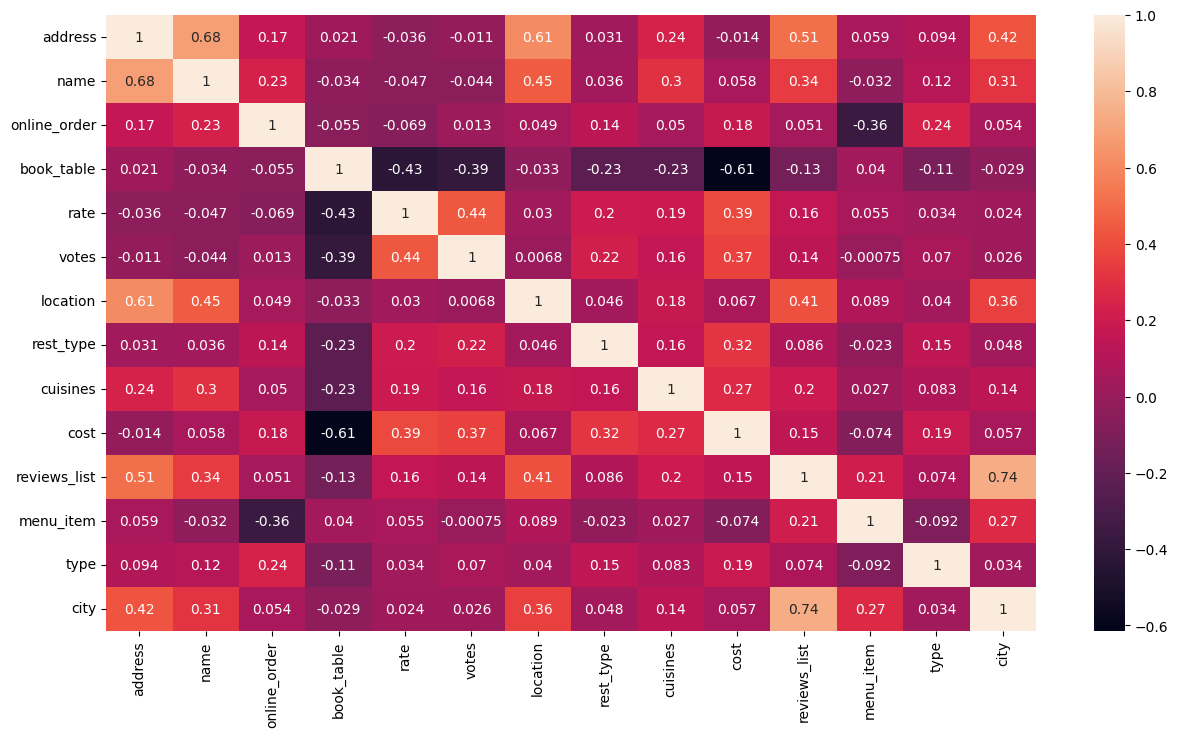

In [31]:
#Get Correlation between different variables
corr = zomato_en.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

#### The highest correlation is between name and address which is 0.62 which is not of very much concern 

### Splitting the Dataset

In [65]:
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41228,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,6,29
41229,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,6,29
41230,8725,6532,1,1,3.6,27,25,17,240,1500.0,20956,6,29
41231,8786,6568,1,0,4.3,236,56,17,237,2500.0,21054,6,29


In [66]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()


,online_order,book_table,votes,location,rest_type,cuisines,cost,type
34084,0,1,110,51,13,97,400.0,2
767,0,1,131,8,4,278,400.0,1
31725,0,1,398,40,0,973,600.0,2
8070,0,1,10,12,2,602,100.0,2
17830,0,1,95,11,34,439,1100.0,2


In [67]:
y_train.head()

34084    3.8
767      3.7
31725    4.1
8070     3.6
17830    3.8
Name: rate, dtype: float64

In [34]:


zomato_en['menu_item'].unique() # seeing the unique values in 'menu_item'

array([   0,    1,    2, ..., 8240, 8241, 8242])

In [35]:
zomato_en['location'].unique() # seeing the unique values in 'location'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])

In [36]:
zomato_en['cuisines'].unique() # seeing the unique values in 'cusines'

array([   0,    1,    2, ..., 2364, 2365, 2366])

In [37]:
zomato_en['rest_type'].unique() # seeing the unique values in 'rest_type'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86])

In [38]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,0,0,775,0,0,0,800.0,0
1,0,1,787,0,0,1,800.0,0
2,0,1,918,0,1,2,800.0,0
3,1,1,88,0,2,3,300.0,0
4,1,1,166,1,0,4,600.0,0


In [27]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

# Data Visualization

In [85]:
zomato.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [88]:
zomato.online_order.value_counts()

online_order
Yes    27081
No     14156
Name: count, dtype: int64

#### Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering online or Not')

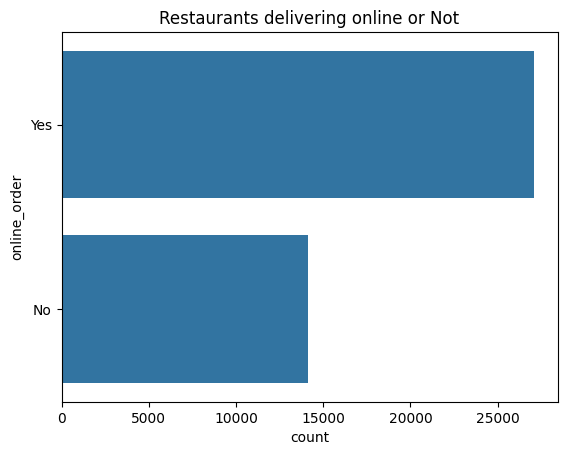

In [39]:
# Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
#fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

#### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

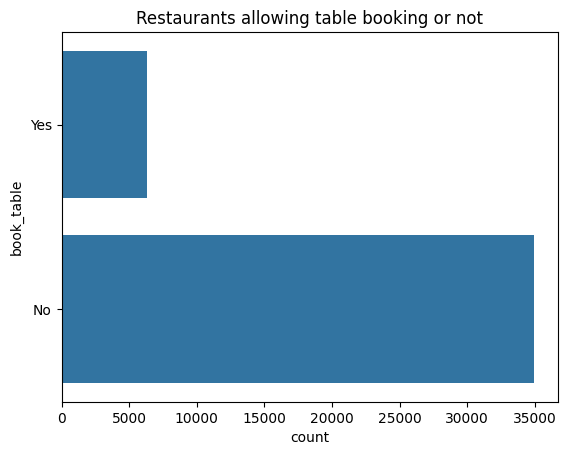

In [40]:
sns.countplot(zomato['book_table'])
#fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

#### Table booking Rate vs Normal Rate

In [41]:
p = pd.crosstab(zomato['rate'], zomato['book_table'])
p

book_table,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0
2.4,66,0
2.5,98,2
2.6,245,4
2.7,299,4


In [100]:
p.sum(1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      66.0
2.5     100.0
2.6     249.0
2.7     303.0
2.8     580.0
2.9     801.0
3.0     990.0
3.1    1550.0
3.2    1844.0
3.3    2272.0
3.4    2444.0
3.5    2763.0
3.6    3286.0
3.7    3807.0
3.8    3816.0
3.9    3954.0
4.0    3144.0
4.1    2925.0
4.2    2154.0
4.3    1682.0
4.4    1146.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [101]:
p.div(p.sum(1).astype(float),axis = 0)

book_table,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,1.000000,0.000000
2.2,0.500000,0.500000
2.3,1.000000,0.000000
2.4,1.000000,0.000000
2.5,0.980000,0.020000
2.6,0.983936,0.016064
2.7,0.986799,0.013201


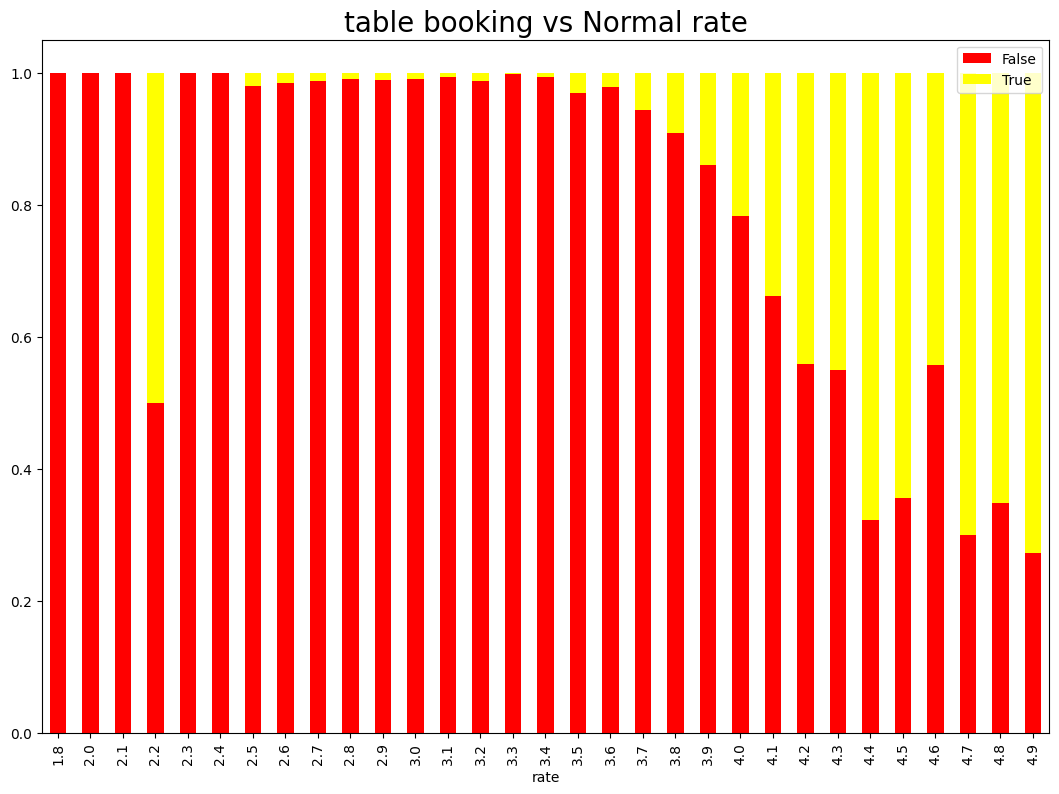

In [30]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

#### Location

/var/folders/wz/n1cn5phd50bcqy11bgwqsnb40000gn/T/ipykernel_36973/1245976576.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Location wise count for restaurants')

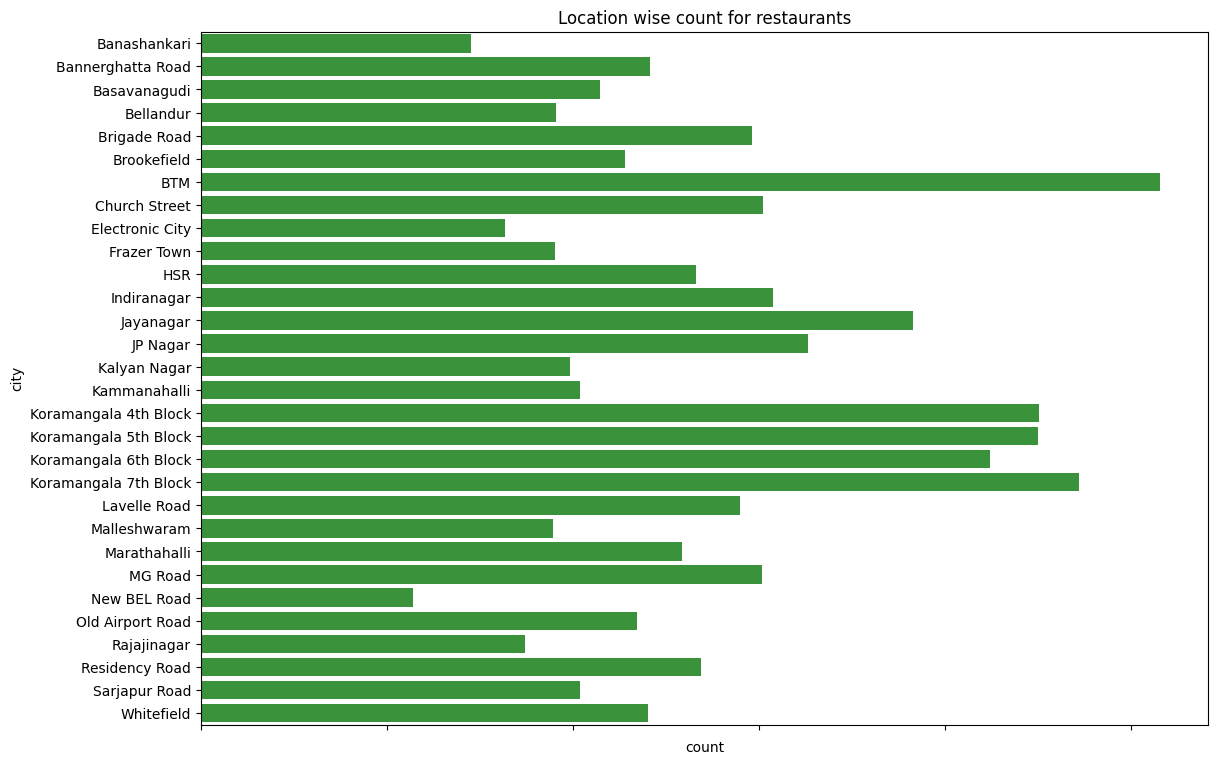

In [35]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
#fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

#### Location and Rating

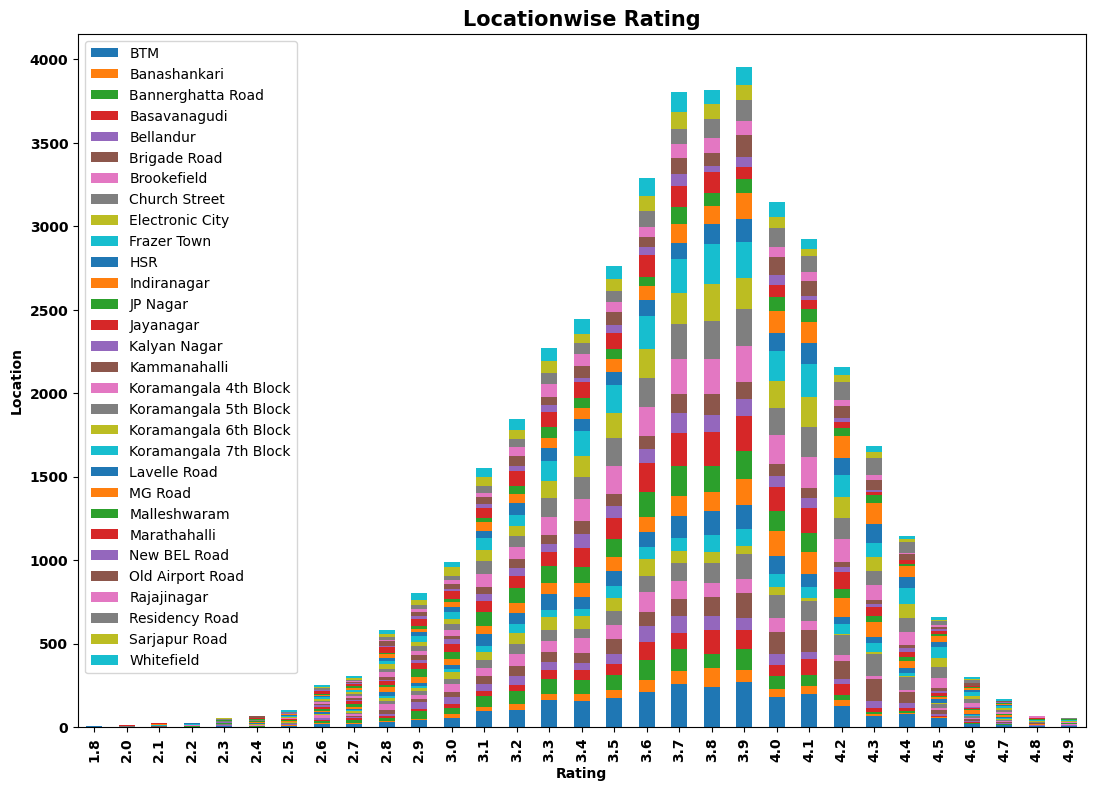

In [36]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

#### Restaurant Type

/var/folders/wz/n1cn5phd50bcqy11bgwqsnb40000gn/T/ipykernel_36973/3291457958.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Restuarant Type')

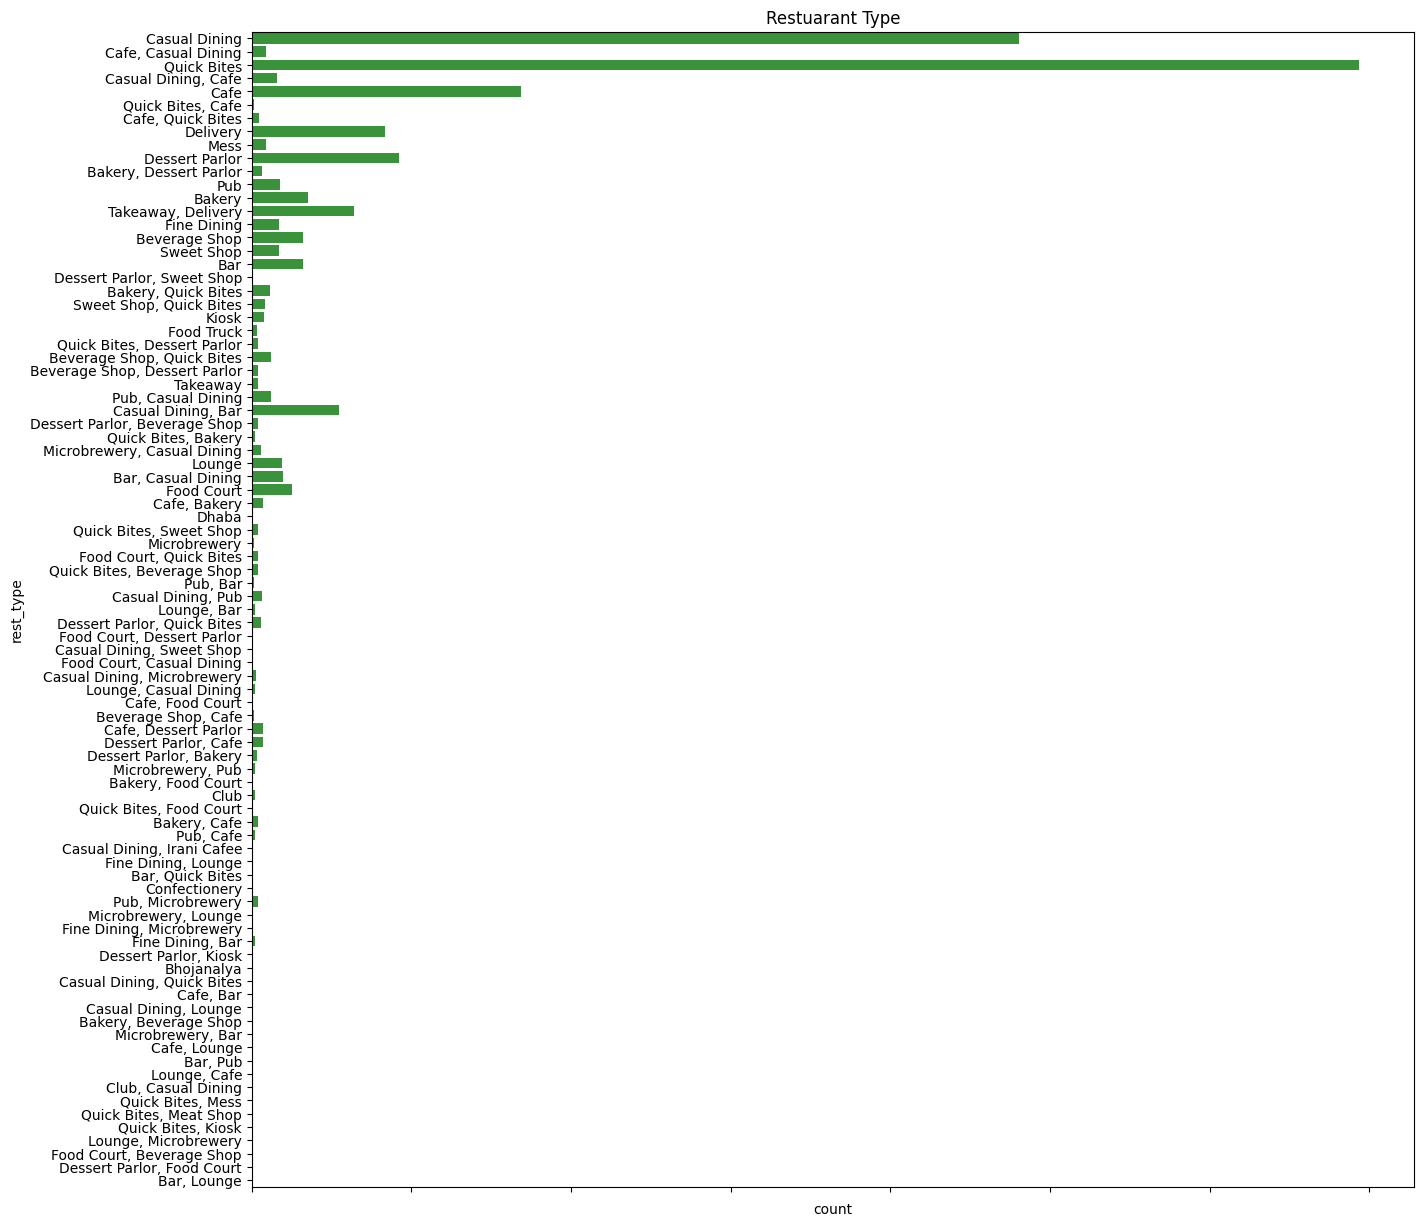

In [37]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

#### Gaussian Rest type and Rating

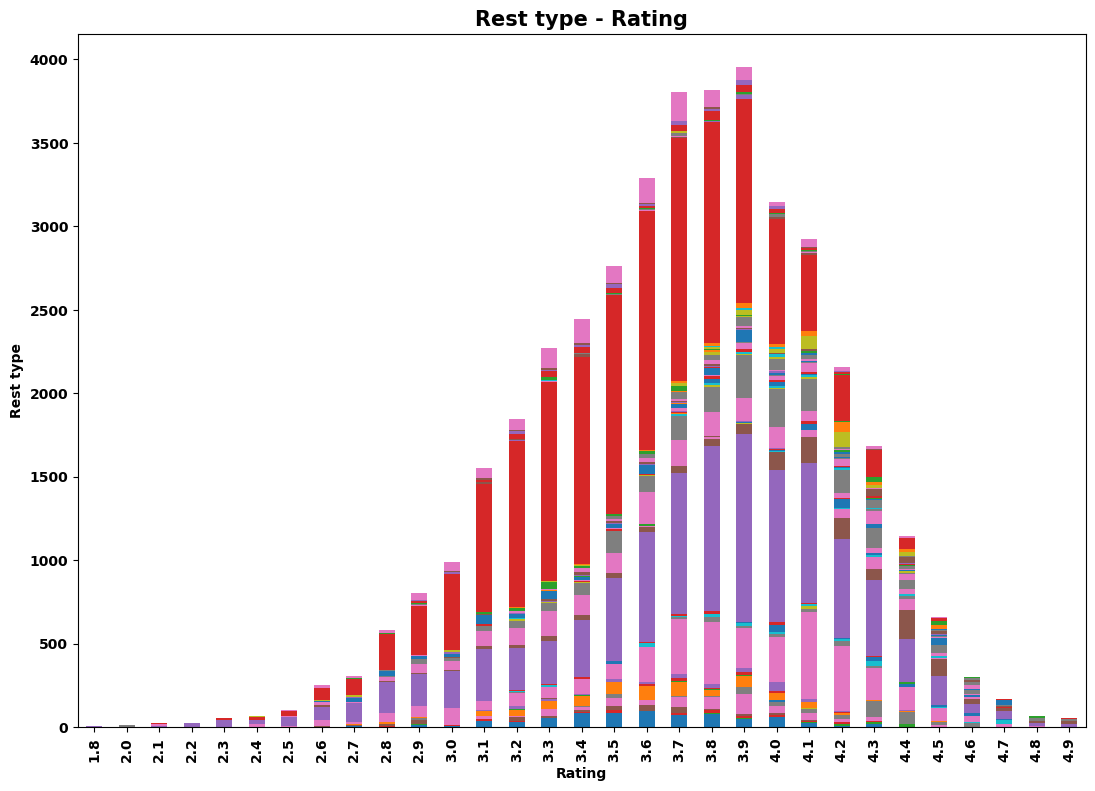

In [38]:
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

#### Types of Services

/var/folders/wz/n1cn5phd50bcqy11bgwqsnb40000gn/T/ipykernel_36973/968758206.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Type of Service')

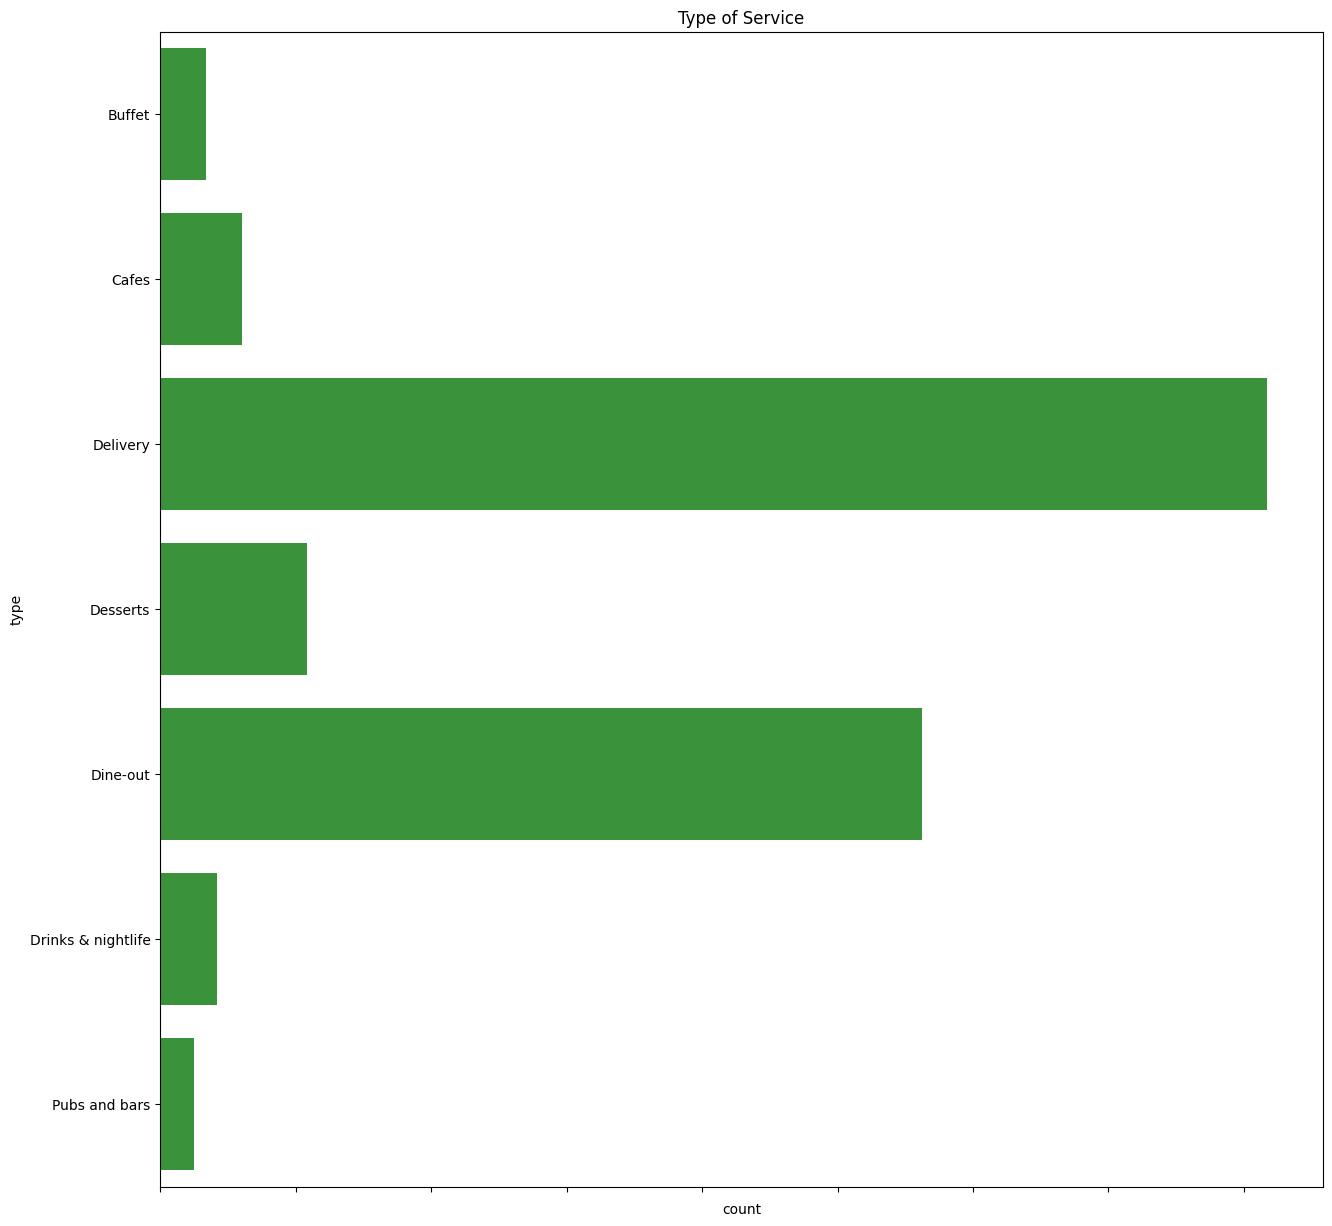

In [39]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

#### Type and Rating

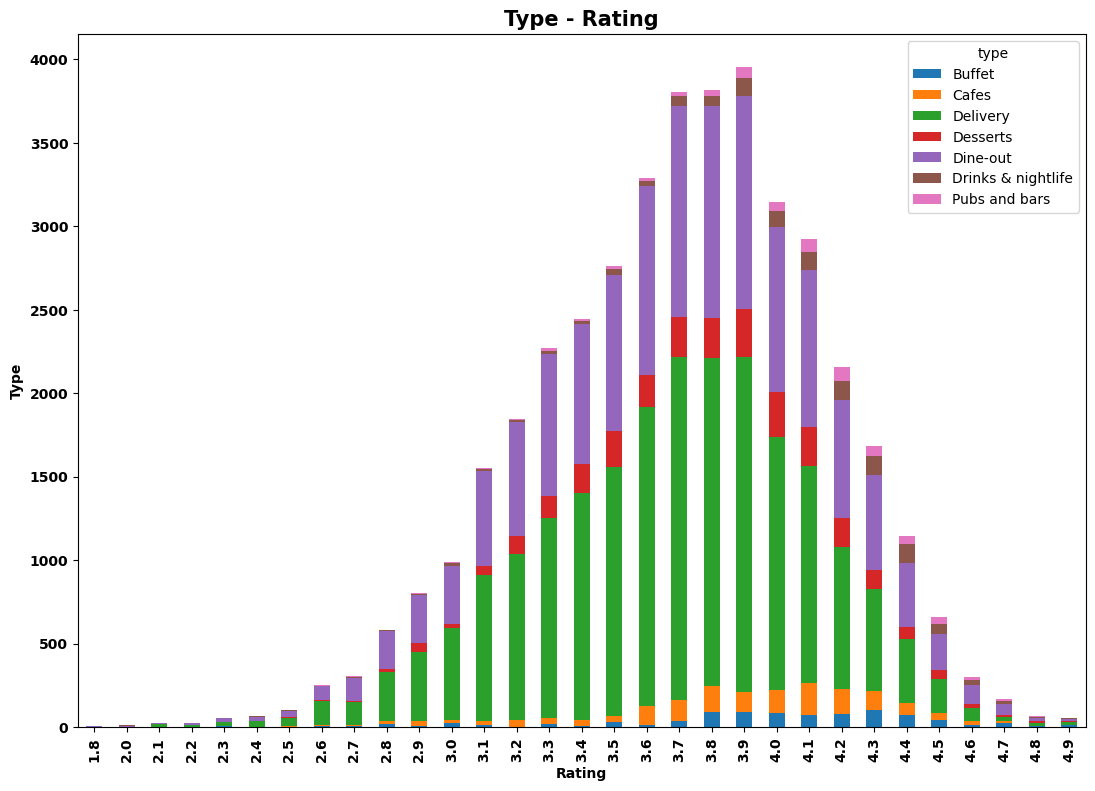

In [40]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Cost of Restuarant

In [ ]:
sns.histplot(zomato['cost'])
#sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
#fig = plt.gcf()
#fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

#### No. of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

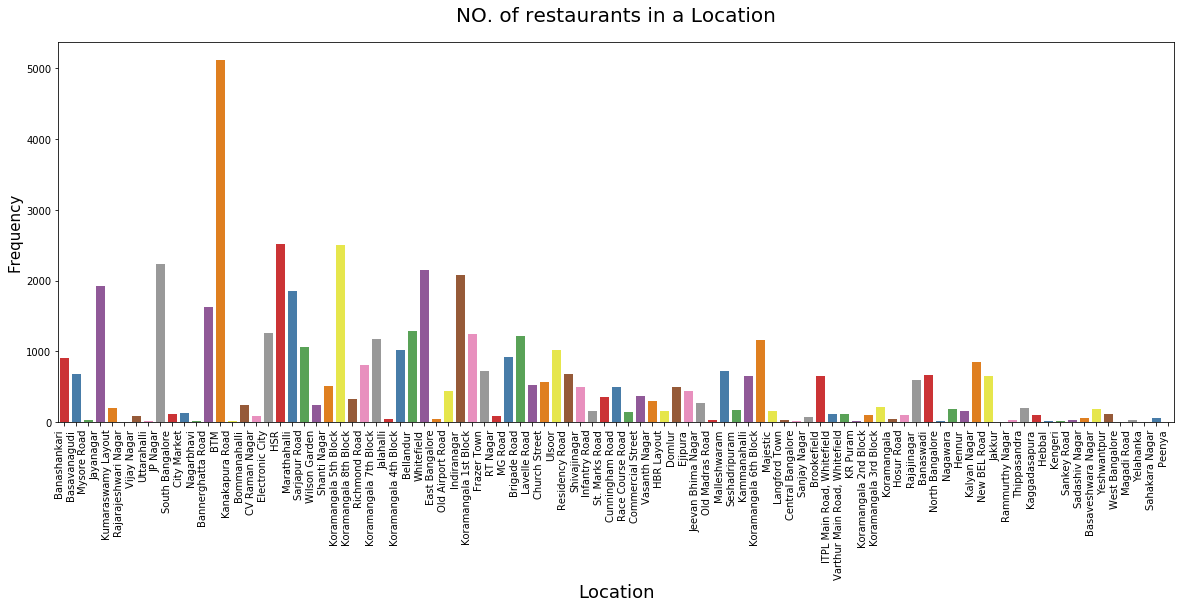

In [46]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

#### Restaurant type

Text(0.5, 1.0, 'Restaurant types')

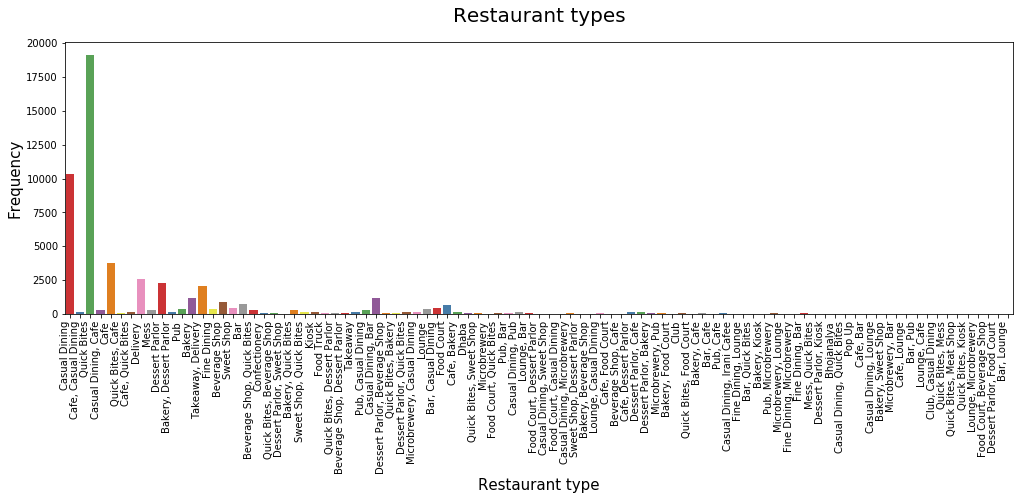

In [47]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

#### Most famous Restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

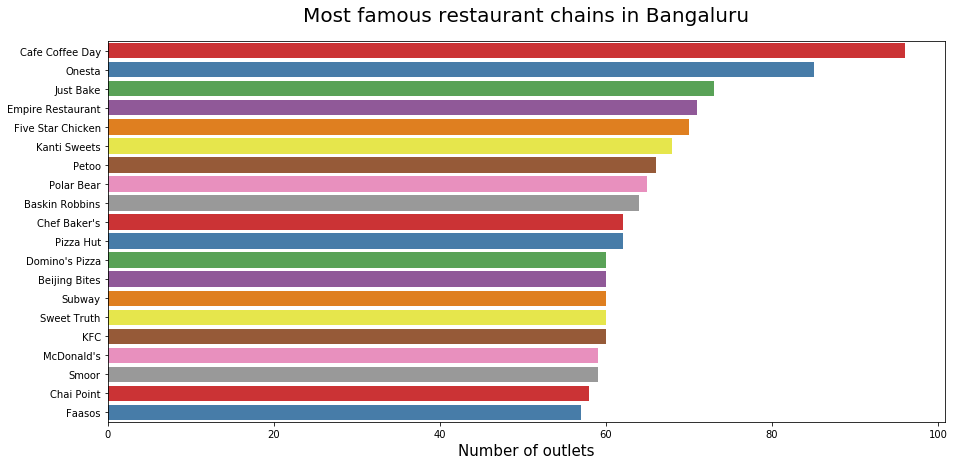

In [48]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)